<a href="https://colab.research.google.com/github/michelmalki/MichelMalki/blob/main/Used_Car_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
url = 'https://raw.githubusercontent.com/nabilbeit/McGill/main/Toyota_Used_Cars_.csv'
df = pd.read_csv(url)
print(df.head(10))


   Price  Age     KM FuelType   HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500   23  46986   Diesel   90         1          0  2000      3    1165   
1  13750   23  72937   Diesel   90         1          0  2000      3    1165   
2  13950   24  41711   Diesel   90         1          0  2000      3    1165   
3  14950   26  48000   Diesel   90         0          0  2000      3    1165   
4  13750   30  38500   Diesel   90         0          0  2000      3    1170   
5  12950   32  61000   Diesel   90         0          0  2000      3    1170   
6  16900   27  94612   Diesel   90         1          0  2000      3    1245   
7  18600   30  75889   Diesel   90         1          0  2000      3    1245   
8  21500   27  19700   Petrol  192         0          0  1800      3    1185   
9  12950   23  71138   Diesel   69         0          0  1900      3    1105   

   Mileage  
0    29196  
1    45321  
2    25918  
3    29826  
4    23923  
5    37904  
6    58789  
7    47155  
8 

In [ ]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])


Number of Rows: 1198
Number of Columns: 11


In [ ]:
category = len(df.select_dtypes(include=['object']).columns)
number = len(df.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', category, 'categorical', '+',
      number, 'numerical', '=', category+number, 'features')


Total Features:  1 categorical + 10 numerical = 11 features


In [ ]:
df.dtypes

Price         int64
Age           int64
KM            int64
FuelType     object
HP            int64
MetColor      int64
Automatic     int64
CC            int64
Doors         int64
Weight        int64
Mileage       int64
dtype: object

In [ ]:
print(df.isnull().sum())

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
Mileage      0
dtype: int64


In [ ]:
df["KM"].value_counts().sort_values()

47171    1
37400    1
37177    1
36544    1
33511    1
        ..
45000    6
36000    7
43000    7
59000    7
1        7
Name: KM, Length: 1068, dtype: int64

In [ ]:
data_corr = df.corr()
data_corr

<ipython-input-125-1da0fe627a23>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = df.corr()


,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Mileage
Price,1.000000,-0.877162,-0.625744,0.358160,0.121731,0.056805,0.142579,0.181321,0.575385,-0.625744
Age,-0.877162,1.000000,0.605178,-0.204268,-0.122013,-0.001329,-0.097737,-0.146070,-0.460701,0.605178
KM,-0.625744,0.605178,1.000000,-0.364532,-0.099636,-0.074100,0.309856,-0.049595,-0.041041,1.000000
HP,0.358160,-0.204268,-0.364532,1.000000,0.062693,0.037744,-0.020446,0.075380,0.066146,-0.364532
MetColor,0.121731,-0.122013,-0.099636,0.062693,1.000000,-0.019658,0.021566,0.083692,0.052818,-0.099635
Automatic,0.056805,-0.001329,-0.074100,0.037744,-0.019658,1.000000,-0.051455,-0.007032,0.065416,-0.074100
CC,0.142579,-0.097737,0.309856,-0.020446,0.021566,-0.051455,1.000000,0.111101,0.642878,0.309855
Doors,0.181321,-0.146070,-0.049595,0.075380,0.083692,-0.007032,0.111101,1.000000,0.285150,-0.049595
Weight,0.575385,-0.460701,-0.041041,0.066146,0.052818,0.065416,0.642878,0.285150,1.000000,-0.041042
Mileage,-0.625744,0.605178,1.000000,-0.364532,-0.099635,-0.074100,0.309855,-0.049595,-0.041042,1.000000


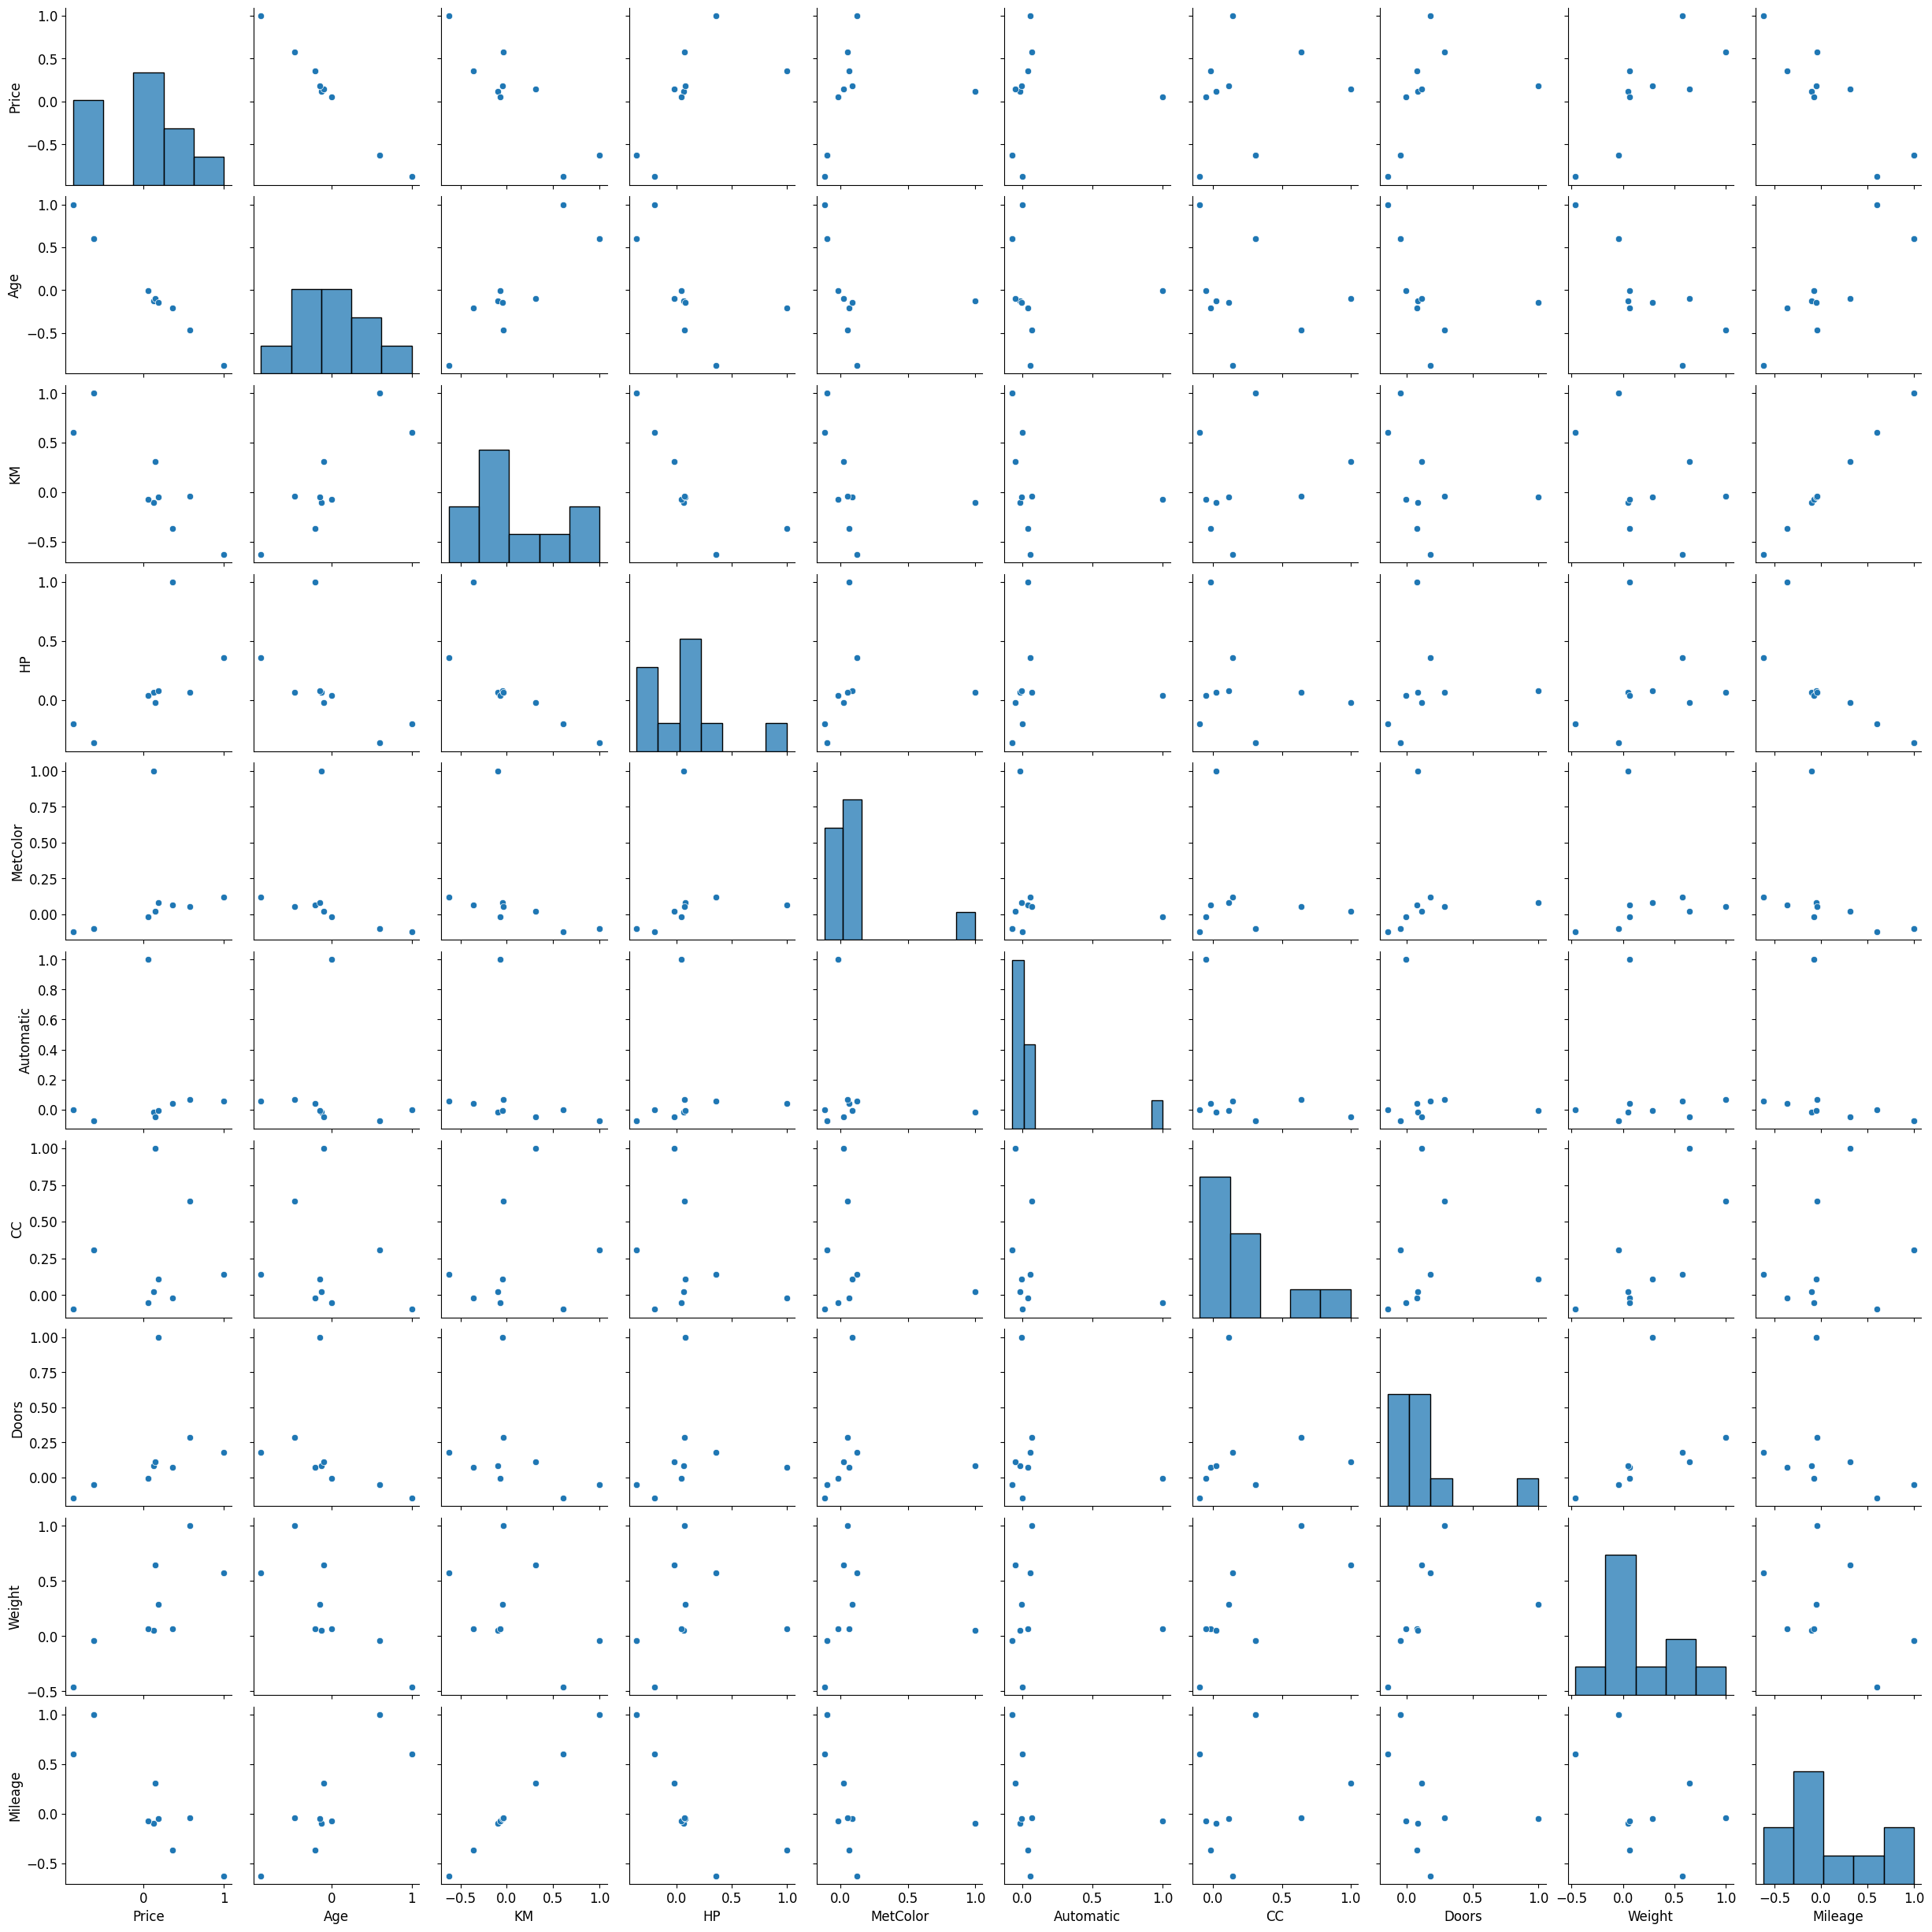

In [ ]:
sns.pairplot(data_corr)

<ipython-input-85-882cb0e7b8b7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


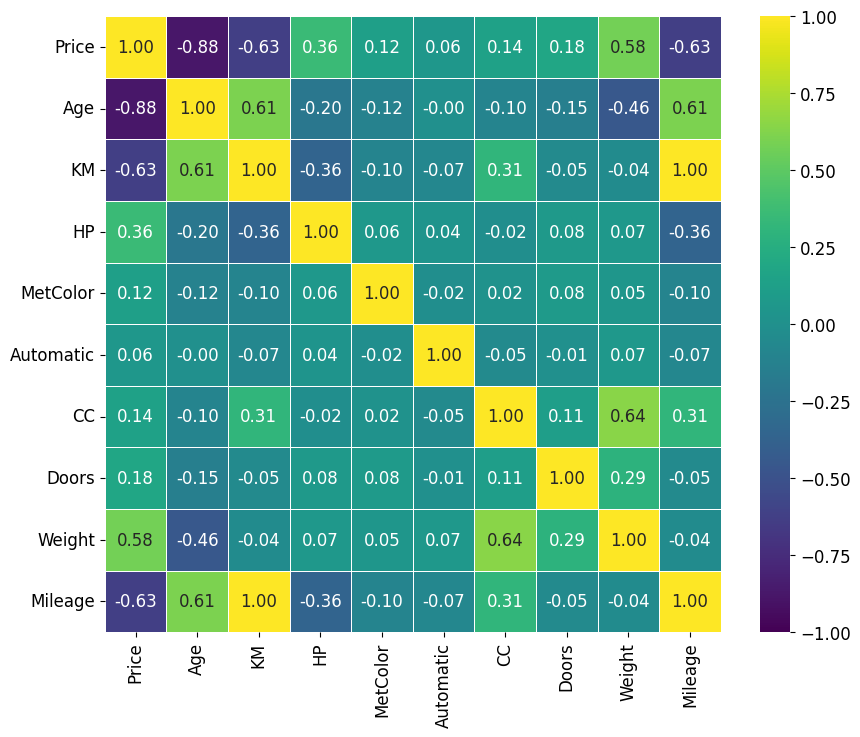

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()


In [ ]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Mileage
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,11243.260434,52.088481,69221.795492,101.343072,0.678631,0.048414,1576.191987,4.064274,1076.470785,43012.429048
std,3743.745345,17.951960,40363.040114,15.575509,0.467197,0.214729,192.441556,0.956030,55.531205,25080.404751
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000,1.000000
25%,8950.000000,41.000000,39458.250000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000,24518.000000
50%,10250.000000,56.000000,61988.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000,38518.000000
75%,12450.000000,65.000000,93059.250000,110.000000,1.000000,0.000000,1600.000000,5.000000,1100.000000,57824.750000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.000000,150993.000000


In [ ]:
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
df1 = df.drop("FuelType", axis=1)
scale_columns =  ['Age','KM','HP','CC','Weight']
features_to_scale = df1.loc[:,scale_columns]
features_to_scale = MinMaxScaler().fit_transform(features_to_scale.values)

df1_scaled = df1.copy() #Copy it to not overwrite it
df1_scaled[scale_columns]=features_to_scale
df1_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1198 non-null   int64  
 1   Age        1198 non-null   float64
 2   KM         1198 non-null   float64
 3   HP         1198 non-null   float64
 4   MetColor   1198 non-null   int64  
 5   Automatic  1198 non-null   int64  
 6   CC         1198 non-null   float64
 7   Doors      1198 non-null   int64  
 8   Weight     1198 non-null   float64
 9   Mileage    1198 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 93.7 KB


In [ ]:
# get_dummies() is a Pandas function performs one-hot encoding
from sklearn.preprocessing import OneHotEncoder
df_encoded = pd.get_dummies(df)
df_encoded.head()
# one-hot encoding helps prevent
# from assuming any ordinal relationship between
# categories and ensures that each category is treated independently.

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Mileage,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,29196,0,1,0
1,13750,23,72937,90,1,0,2000,3,1165,45321,0,1,0
2,13950,24,41711,90,1,0,2000,3,1165,25918,0,1,0
3,14950,26,48000,90,0,0,2000,3,1165,29826,0,1,0
4,13750,30,38500,90,0,0,2000,3,1170,23923,0,1,0


In [ ]:
data = df_encoded.drop('Price', axis = 1)
target = df_encoded['Price']

In [ ]:
print("Shape of x_train: ",data.shape)
print("Shape of y_train: ",target.shape)

Shape of x_train:  (1198, 12)
Shape of y_train:  (1198,)


In [ ]:
# Partition the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train,  x_test, y_train,  y_test = train_test_split(data,target,test_size=0.2, random_state=42)
print(x_train)
print(y_train)

      Age      KM   HP  MetColor  Automatic    CC  Doors  Weight  Mileage  \
331    35   32941  110         1          0  1600      5    1080    20469   
409    54  101352  110         0          0  1600      5    1080    62977   
76     31   25266  110         1          0  1600      5    1130    15700   
866    58   63870   72         0          0  2000      5    1135    39687   
138    11   25000  116         1          0  2000      5    1320    15534   
...   ...     ...  ...       ...        ...   ...    ...     ...      ...   
1044   73  232940   72         0          0  2000      5    1172   144742   
1095   76  125778  110         0          0  1600      3    1050    78155   
1130   73  107108  110         1          0  1600      3    1050    66554   
860    63   64690   86         0          0  1300      3    1020    40196   
1126   80  110000  110         1          0  1600      4    1035    68351   

      FuelType_CNG  FuelType_Diesel  FuelType_Petrol  
331              0  

In [ ]:
# Normalizing the Data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(data)
pd.DataFrame(x_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.621028,-0.551125,-0.728567,0.688153,-0.22556,2.203188,-1.113687,1.594890,-0.551115,-0.119977,2.633206,-2.476076
1,-1.621028,0.092083,-0.728567,0.688153,-0.22556,2.203188,-1.113687,1.594890,0.092085,-0.119977,2.633206,-2.476076
2,-1.565300,-0.681868,-0.728567,0.688153,-0.22556,2.203188,-1.113687,1.594890,-0.681870,-0.119977,2.633206,-2.476076
3,-1.453845,-0.525993,-0.728567,-1.453165,-0.22556,2.203188,-1.113687,1.594890,-0.525986,-0.119977,2.633206,-2.476076
4,-1.230936,-0.761455,-0.728567,-1.453165,-0.22556,2.203188,-1.113687,1.684968,-0.761447,-0.119977,2.633206,-2.476076


In [ ]:
import sklearn.metrics as metrics
import numpy as np

lr = LinearRegression()
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)
score = lr.score(x_test,y_test)
r2 = metrics.r2_score(y_test, prediction)
mse = metrics.mean_squared_error(y_test, prediction)
mae = metrics.mean_absolute_error(y_test, prediction)

print('R Square Score: ', score)

print('Mean absolute error :', mae)

print('Mean Squared Error: ', mse)

print('Coefficients:', lr.coef_)

print('Intercept:', lr.intercept_)
#R-squared: This represents the proportion of the variance in the dependent variable
#coef (coefficient): These are the weights of the predictor variables.


R Square Score:  0.8608013652117421
Mean absolute error : 1033.9367349610484
Mean Squared Error:  1888208.4907539147
Coefficients: [ -128.87691864   -68.77050947    60.46894939    75.05437302
   422.59461789    -3.19252375    22.38301268    17.27792339
   110.65084985 -1453.56022765  1747.94256695  -294.3823393 ]
Intercept: -797.5132574262279


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.5 MB/s eta 0:00:00


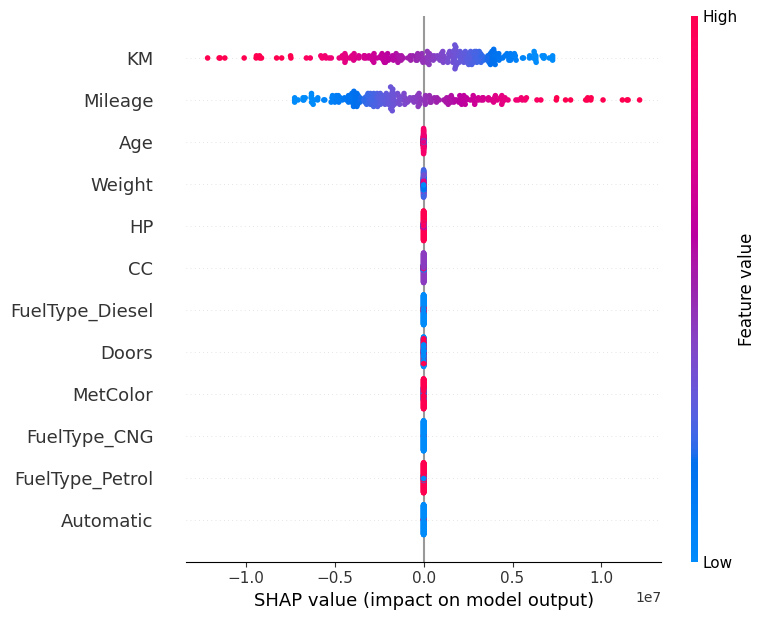

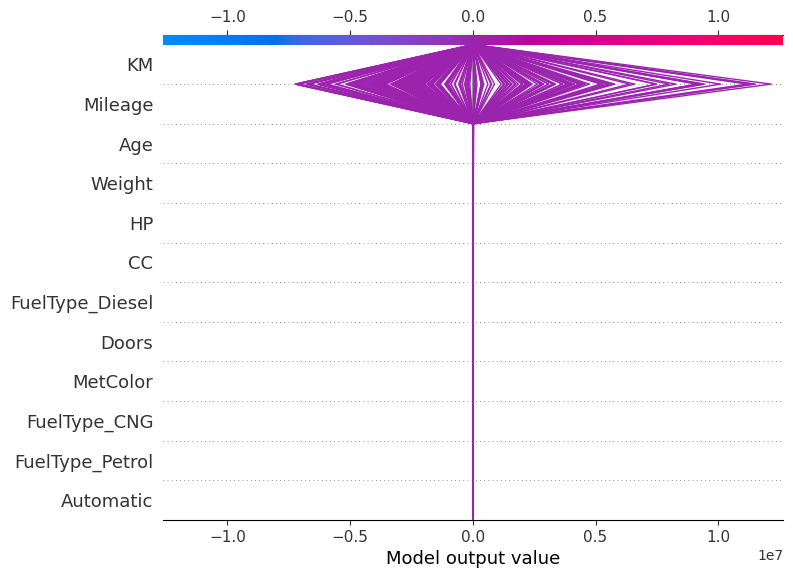

In [ ]:
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
lr = LinearRegression()
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)

# Compute Shapley values
explainer = shap.Explainer(lr, x_train)
shap_values = explainer(x_test)

# Summarize the Shapley values in a plot
shap.summary_plot(shap_values, x_test)

shap.decision_plot(explainer.expected_value, shap_values.values, x_test)

In [ ]:
# Regression Diagnostics
from sklearn.linear_model import LinearRegression

# Assuming X_train and y_train are your features and target variable
lr = LinearRegression()
lr.fit(x_train, y_train)

# Get the coefficients and the intercept
coefficient = lr.coef_
intercept = lr.intercept_

# Print the intercept
print(f'The intercept of the model is {intercept}')

# Print each coefficient
print(f'The coefficient of the model is {coefficient}')



The intercept of the model is -797.5132574262279
The coefficient of the model is [ -128.87691864   -68.77050947    60.46894939    75.05437302
   422.59461789    -3.19252375    22.38301268    17.27792339
   110.65084985 -1453.56022765  1747.94256695  -294.3823393 ]


In [ ]:
#Construct the linear regression equation from your model’s coefficients including the intercept.

def calc(slope, intercept, Price):
    return slope*Price+intercept

score = calc(lr.coef_, lr.intercept_, 1000)
print(score)
y_pred = lr.predict(x_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)
# the predicted percentages are close to the actual ones.
#We quantify the difference between the actual and predicted values to gain an objective view of how it's actually performing.

[ -129674.43190229   -69568.02272383    59671.43613061    74256.85976216
   421797.10463752    -3990.03700361    21585.49941935    16480.41013439
   109853.33659639 -1454357.74090634  1747145.05369549  -295179.85256143]
      Actual     Predicted
1176    9250   7298.466582
1014   10450  10028.362543
101    16250  16674.173938
439    12500  10812.159672
58     18950  17887.804259
...      ...           ...
382     8900   9754.414102
865     9500   8102.436705
542    10500  10998.075030
1191    7950   7050.631870
872    10295   9109.409547

[240 rows x 2 columns]


<Figure size 800x500 with 0 Axes>

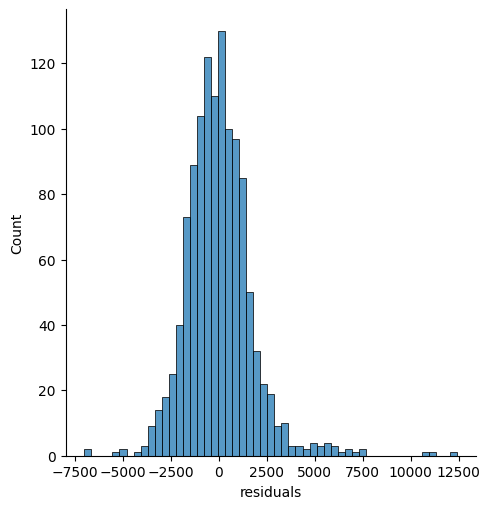

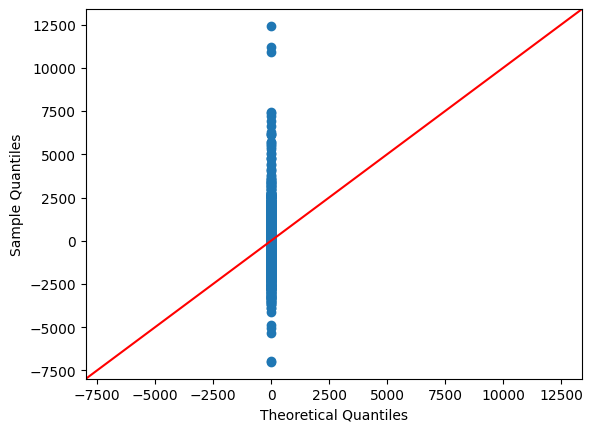

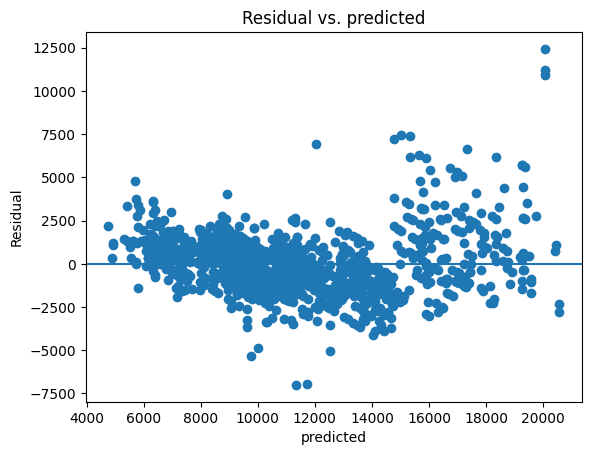

In [14]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

x1= df[['Mileage', 'Age', 'KM']]
y1 = df['Price']

x1 = sm.add_constant(x1)
model = sm.OLS(y1, x1)
results = model.fit()

residuals = results.resid

plt.figure(figsize=(8, 5))
sns.displot(residuals)
plt.xlabel('residuals')
plt.show()

sm.qqplot(residuals, line='45')
plt.show()

plt.scatter(results.predict(), residuals)
plt.xlabel('predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. predicted')
plt.show()

# Heteroscedasticity will appear as a funnel shape in the plot. Homoscedasticity will appear as a roughly horizontal band around the line y=0.


  variables           VIF
0     const  9.442059e+00
1   Mileage  7.456927e+09
2       Age  1.578213e+00
3        KM  7.456927e+09


<ipython-input-15-927a3a767fb5>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


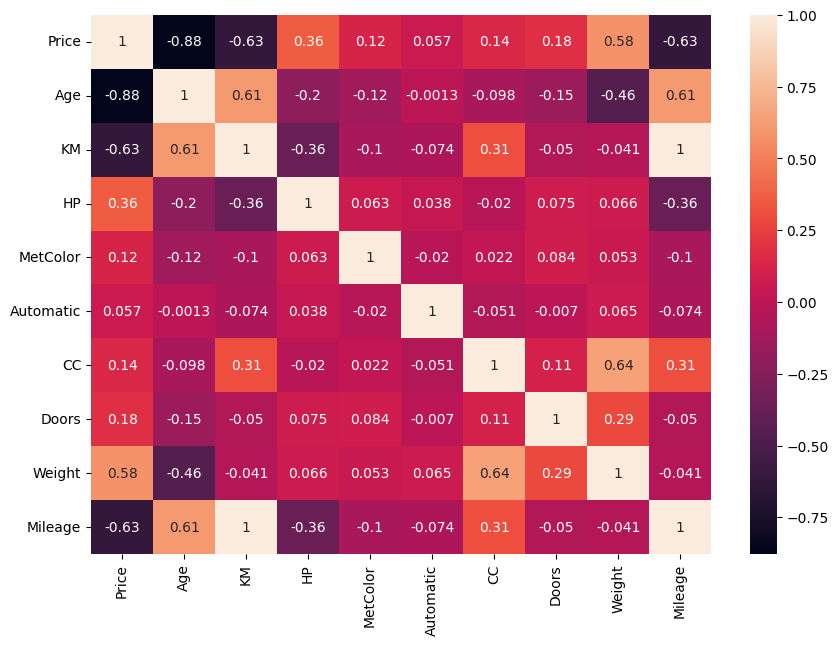

In [15]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import matplotlib.pyplot as plt

x2 = df[['Mileage', 'Age', 'KM']]

x2 = sm.add_constant(x2)
vif = pd.DataFrame()
vif["variables"] = x2.columns
vif["VIF"] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]

print(vif)

corrMatrix = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corrMatrix, annot=True)
plt.show()


In [25]:
import statsmodels.formula.api as smf

model_before = smf.ols(formula='Price ~  KM + Age + Mileage', data=df)
results_before = model_before.fit()
# The code of model_after = smf.ols is using the ols function from the statsmodels.formula.api module
# to create an Ordinary Least Squares (OLS) regression model.

In [21]:

df_updated = df[['Mileage', 'Age', 'KM', 'Price']]
model_after = smf.ols(formula='Price ~  KM + Age + Mileage', data=df_updated)
results_after = model_after.fit()

#this  code is creating an OLS regression model where ‘Price’ is the dependent variable
# and ‘Age’, ‘KM’, ‘HP’, Price and ‘Weight’ are the independent variables,
 #using the data from the DataFrame df_updated. The model is then stored in the variable model_after

In [22]:
print("BEFORE DIAGNOSTICS")
print(results_before.summary())
print("\nAFTER DIAGNOSTICS")
print(results_after.summary())
#the goal is to make the model better at predicting the dependent variable,
# not to make these statistics look good. Always check the performance of your model

BEFORE DIAGNOSTICS
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     1442.
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:56:59   Log-Likelihood:                -10639.
No. Observations:                1198   AIC:                         2.129e+04
Df Residuals:                    1194   BIC:                         2.131e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.075e+04    154.790 